# 富士山下山問題

## 【問題0】標高データの取得
標高データにアクセスし、パスワード入力欄に1632を入力します。
アクセス先からmtfuji_data.csvをダウンロードしてください。

以下のコードを実行し、ダウンロードしたmtfuji_data.csvを読み込みます。

In [1]:
import numpy as np
csv_path = 'mtfuji_data.csv'

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

In [3]:
position = fuji[:, 0]
elevation = fuji[:, 3]

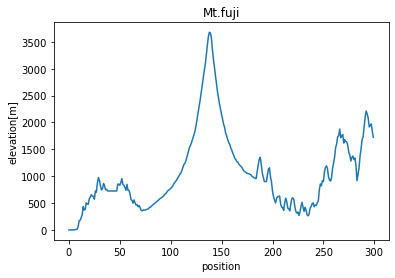

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Mt.fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.plot(position, elevation);

## 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

$$\mbox{勾配}=\frac{\mbox{yの変化量}}{\mbox{xの変化量}}$$

In [5]:
def get_slope(pos):
    """
    function : 今いる地点の番号[pos]と今いる隣の地点の番号（pos-1）の関係による勾配[slope]を求める関数
    
    params
    -------------------
    pos : int
        今いる地点の番号
    -------------------
    return : slope
        勾配
    """
    
    x_change = 1 # xの変化量　pos - (pos - 1) = 1
    y_change = elevation[pos] - elevation[pos - 1] # yの変化量
    slope = y_change / x_change # 勾配
    
    return slope

In [6]:
test = 131
y_change = elevation[131] - elevation[130]
print(y_change == get_slope(test))

True


## 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の戻り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

In [7]:
def get_destination(pos):
    """
    function : 今いる地点の勾配[slope]の情報を元に、移動先の地点[destination]を計算する関数
    
    params
    -------------------
    pos : int
        今いる地点の番号
    -------------------
    return : destination
        移動先の地点
    """
    
    h_param = 0.2 # ハイパーパラメータの設定
    destination = pos - (h_param * get_slope(pos)) # get_slope(pos) : 今いる地点の勾配
    destination = round(destination) # 四捨五入して再納
    if destination < 0:
        destination = 0 # 地点の最小値は0
    elif destination > 299:
        destination = 299 # 地点の最大値は299
    return destination

## 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の戻り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

《実装上の注意》

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [8]:
start_pos = 136 # 地点136からの下山
while True:
    start_pos = get_destination(start_pos) # 地点の更新
    if start_pos == get_destination(start_pos): # 地点が更新しなくなった場合停止
        break

In [9]:
start_pos == get_destination(start_pos)

True

## 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

《可視化例》

断面図の中に移動した地点を点で表示する  
繰り返し毎の標高や勾配を折れ線グラフにする

In [10]:
start_pos = 136 # 地点136からの下山
count_list = [0] # 繰り返し回数のリスト
pos_list = [start_pos] # 地点のリスト
ele_list = [elevation[start_pos]] # 標高のリスト
slope = get_slope(start_pos)
slo_list = [slope] # 勾配のリスト

while True:
    start_pos = get_destination(start_pos) # 地点の更新
    count_list.append(count_list[-1] + 1)
    pos_list.append(start_pos)
    ele_list.append(elevation[start_pos])
    slope = get_slope(start_pos)
    slo_list.append(slope)
    if start_pos == get_destination(start_pos): # 地点が更新しなくなった場合停止
        break

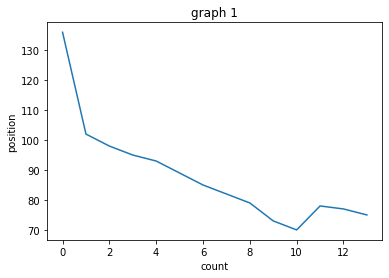

In [11]:
# 繰り返し地点と回数のグラフ
plt.title('graph 1')
plt.xlabel('count')
plt.ylabel('position')
plt.plot(count_list, pos_list);

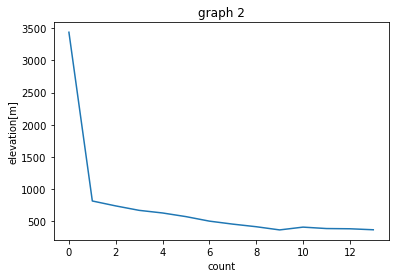

In [12]:
# 標高と回数のグラフ
plt.title('graph 2')
plt.xlabel('count')
plt.ylabel('elevation[m]')
plt.plot(count_list, ele_list);

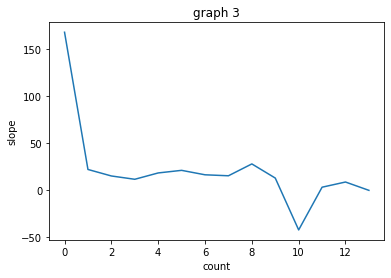

In [13]:
# 勾配と回数のグラフ
plt.title('graph 3')
plt.xlabel('count')
plt.ylabel('slope')
plt.plot(count_list, slo_list);

## 【問題6】初期値の変更
問題4では最初の「今いる地点」を136と固定しましたが、これを他の全ての点で計算してください。具体的には、「今いる地点」を変更できるようにするということです。

In [14]:
def compute_gesan(start_pos):
    """
    function
    -------------------------------------------------------------------------------------------------------------------------
    初期位置　[start_pos]を渡すと回数のリスト[count_list]、地点のリスト[pos_list]、標高のリスト[ele_list]、勾配のリスト[slo_list]を返す関数
    
    params
    ---------------
    start_pos : int
        初期位置
      
    return 
    -----------------
    count_list : list
    pos_list : list
    ele_list : list
    slo_list : list
    """
    
    count_list = [0] # 繰り返し回数のリスト
    pos_list = [start_pos] # 地点のリスト
    ele_list = [elevation[start_pos]] # 標高のリスト
    slope = get_slope(start_pos)
    slo_list = [slope] # 勾配のリスト

    while True:
        start_pos = get_destination(start_pos) # 地点の更新
        count_list.append(count_list[-1] + 1)
        pos_list.append(start_pos)
        ele_list.append(elevation[start_pos])
        slope = get_slope(start_pos)
        slo_list.append(slope)
        if start_pos == get_destination(start_pos): # 地点が更新しなくなった場合停止
            break
        if count_list[-1] == 100: # 無限ループ防止
            break
    
    return count_list, pos_list, ele_list, slo_list

In [15]:
# 初期位置の変更
test1 = 50
test2 = 100
test3 = 150
test4 = 200
test5 = 250
c_test1, p_test1, e_test1, s_test1 = compute_gesan(test1)
c_test2, p_test2, e_test2, s_test2 = compute_gesan(test2)
c_test3, p_test3, e_test3, s_test3 = compute_gesan(test3)
c_test4, p_test4, e_test4, s_test4 = compute_gesan(test4)
c_test5, p_test5, e_test5, s_test5 = compute_gesan(test5)

In [16]:
print(c_test1[-1])
print(c_test2[-1])
print(c_test3[-1])
print(c_test4[-1])
print(c_test5[-1])

3
7
100
100
100


In [17]:
print(p_test1[-1])
print(p_test2[-1])
print(p_test3[-1])
print(p_test4[-1])
print(p_test5[-1])

80
75
177
239
239


## 【問題7】初期値ごとの下山過程の可視化
問題6では全初期値の下山過程を計算しました。そこで、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。勾配降下法において 初期値 が結果に影響を与えることが確認できます。

《初期値とは》

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なる斜面を下ることになります。

### 繰り返し回数と位置の関係

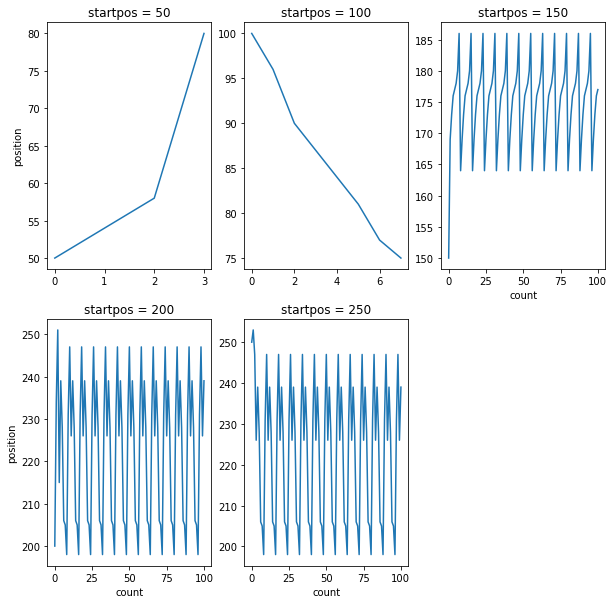

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))
ax[0, 0].plot(c_test1, p_test1)
ax[0, 1].plot(c_test2, p_test2)
ax[0, 2].plot(c_test3, p_test3)
ax[1, 0].plot(c_test4, p_test4)
ax[1, 1].plot(c_test5, p_test5)
ax[1, 2].axis('off') # 使用していない領域の削除

ax[0, 0].set_title("startpos = 50")
ax[0, 1].set_title("startpos = 100")
ax[0, 2].set_title("startpos = 150")
ax[1, 0].set_title("startpos = 200")
ax[1, 1].set_title("startpos = 250")

ax[0, 2].set_xlabel('count')
ax[1, 0].set_xlabel('count')
ax[1, 1].set_xlabel('count')

ax[0, 0].set_ylabel('position')
ax[1, 0].set_ylabel('position');

### 繰り返し回数と標高の関係

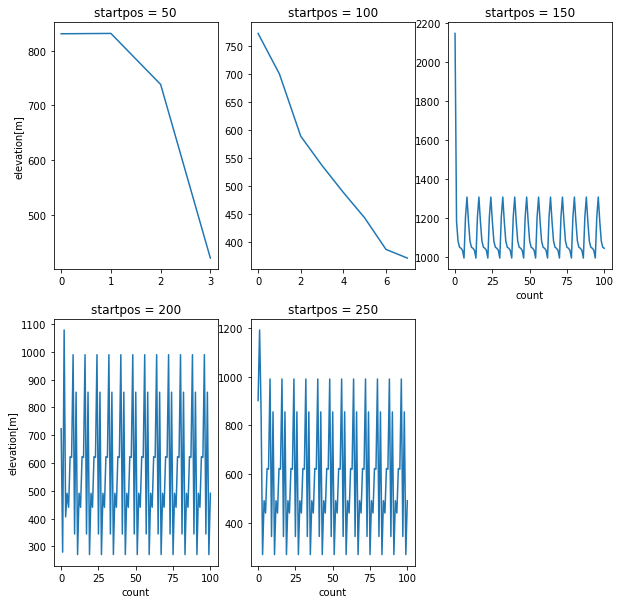

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))
ax[0, 0].plot(c_test1, e_test1)
ax[0, 1].plot(c_test2, e_test2)
ax[0, 2].plot(c_test3, e_test3)
ax[1, 0].plot(c_test4, e_test4)
ax[1, 1].plot(c_test5, e_test5)
ax[1, 2].axis('off') # 使用していない領域の削除

ax[0, 0].set_title("startpos = 50")
ax[0, 1].set_title("startpos = 100")
ax[0, 2].set_title("startpos = 150")
ax[1, 0].set_title("startpos = 200")
ax[1, 1].set_title("startpos = 250")

ax[0, 2].set_xlabel('count')
ax[1, 0].set_xlabel('count')
ax[1, 1].set_xlabel('count')

ax[0, 0].set_ylabel('elevation[m]')
ax[1, 0].set_ylabel('elevation[m]');

### 繰り返し回数と勾配の関係

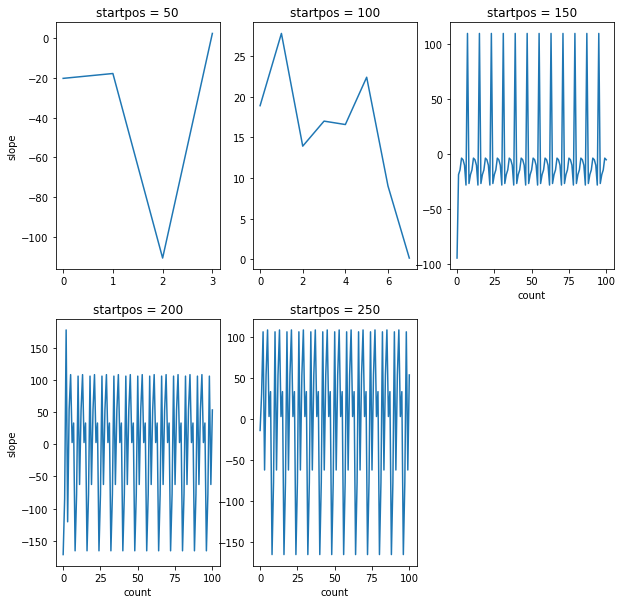

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))
ax[0, 0].plot(c_test1, s_test1)
ax[0, 1].plot(c_test2, s_test2)
ax[0, 2].plot(c_test3, s_test3)
ax[1, 0].plot(c_test4, s_test4)
ax[1, 1].plot(c_test5, s_test5)
ax[1, 2].axis('off') # 使用していない領域の削除

ax[0, 0].set_title("startpos = 50")
ax[0, 1].set_title("startpos = 100")
ax[0, 2].set_title("startpos = 150")
ax[1, 0].set_title("startpos = 200")
ax[1, 1].set_title("startpos = 250")

ax[0, 2].set_xlabel('count')
ax[1, 0].set_xlabel('count')
ax[1, 1].set_xlabel('count')

ax[0, 0].set_ylabel('slope')
ax[1, 0].set_ylabel('slope');

## 【問題8】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータを変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

pos=150,200,250で勾配が収束せず、終了している   
ハイパーパラメータが高いことが原因である  
しかし下げすぎると計算に時間がかかるため、適切な値を求める必要がある  
また、200,250に関しては同じ地点で詰まっていると考えられる

In [21]:
# ハイパーパラメータを変更できる様調整
def get_destination_re(pos, h_param=0.2):
    """
    function : 今いる地点の勾配[slope]の情報を元に、移動先の地点[destination]を計算する関数
    
    params
    -------------------
    pos : int
        今いる地点の番号
    -------------------
    return : destination
        移動先の地点
    """
    
    destination = pos - (h_param * get_slope(pos)) # get_slope(pos) : 今いる地点の勾配
    destination = round(destination) # 四捨五入して再納
    if destination < 0:
        destination = 0 # 地点の最小値は0
    elif destination > 299:
        destination = 299 # 地点の最大値は299
    return destination

In [22]:
# ハイパーパラメータを変更できる様調整
def compute_gesan_re(start_pos, h_param=0.2):
    """
    function
    -------------------------------------------------------------------------------------------------------------------------
    初期位置　[start_pos]を渡すと回数のリスト[count_list]、地点のリスト[pos_list]、標高のリスト[ele_list]、勾配のリスト[slo_list]を返す関数
    
    params
    ---------------
    start_pos : int
        初期位置
      
    return 
    -----------------
    count_list : list
    pos_list : list
    ele_list : list
    slo_list : list
    """
    
    count_list = [0] # 繰り返し回数のリスト
    pos_list = [start_pos] # 地点のリスト
    ele_list = [elevation[start_pos]] # 標高のリスト
    slope = get_slope(start_pos)
    slo_list = [slope] # 勾配のリスト

    while True:
        start_pos = get_destination_re(start_pos, h_param) # 地点の更新
        count_list.append(count_list[-1] + 1)
        pos_list.append(start_pos)
        ele_list.append(elevation[start_pos])
        slope = get_slope(start_pos)
        slo_list.append(slope)
        if start_pos == get_destination_re(start_pos, h_param): # 地点が更新しなくなった場合停止
            break
        if count_list[-1] == 100: # 無限ループ防止
            break
    
    return count_list, pos_list, ele_list, slo_list

### ハイパーパラメータ = 0.1

In [23]:
c_test3, p_test3, e_test3, s_test3 = compute_gesan_re(test3, h_param=0.1) # 再度計算
c_test4, p_test4, e_test4, s_test4 = compute_gesan_re(test4, h_param=0.1)
c_test5, p_test5, e_test5, s_test5 = compute_gesan_re(test5, h_param=0.1)

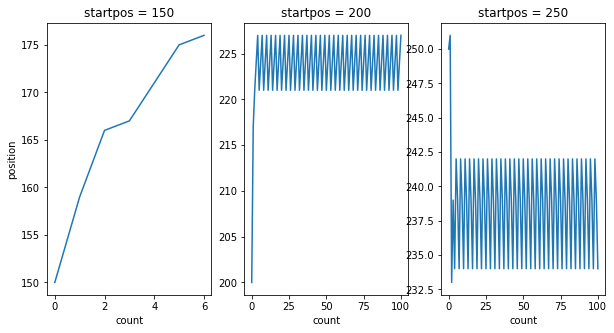

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].plot(c_test3, p_test3)
ax[1].plot(c_test4, p_test4)
ax[2].plot(c_test5, p_test5)

ax[0].set_title("startpos = 150")
ax[1].set_title("startpos = 200")
ax[2].set_title("startpos = 250")

ax[0].set_xlabel('count')
ax[1].set_xlabel('count')
ax[2].set_xlabel('count')

ax[0].set_ylabel('position');

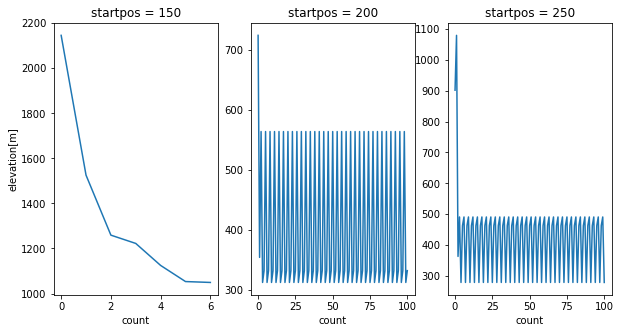

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].plot(c_test3, e_test3)
ax[1].plot(c_test4, e_test4)
ax[2].plot(c_test5, e_test5)

ax[0].set_title("startpos = 150")
ax[1].set_title("startpos = 200")
ax[2].set_title("startpos = 250")

ax[0].set_xlabel('count')
ax[1].set_xlabel('count')
ax[2].set_xlabel('count')

ax[0].set_ylabel('elevation[m]');

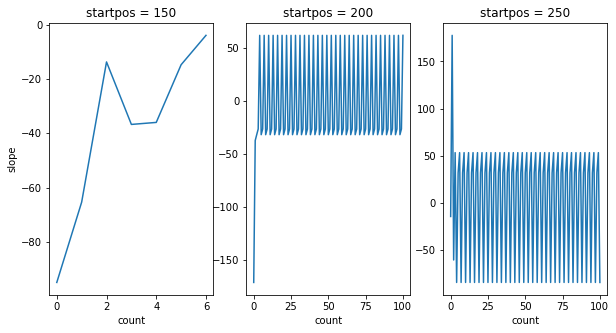

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].plot(c_test3, s_test3)
ax[1].plot(c_test4, s_test4)
ax[2].plot(c_test5, s_test5)

ax[0].set_title("startpos = 150")
ax[1].set_title("startpos = 200")
ax[2].set_title("startpos = 250")

ax[0].set_xlabel('count')
ax[1].set_xlabel('count')
ax[2].set_xlabel('count')

ax[0].set_ylabel('slope');

### ハイパーパラメータ = 0.05

In [27]:
c_test4, p_test4, e_test4, s_test4 = compute_gesan_re(test4, h_param=0.05) #h=0.1で収束しなかったため下げて再挑戦
c_test5, p_test5, e_test5, s_test5 = compute_gesan_re(test5, h_param=0.05)

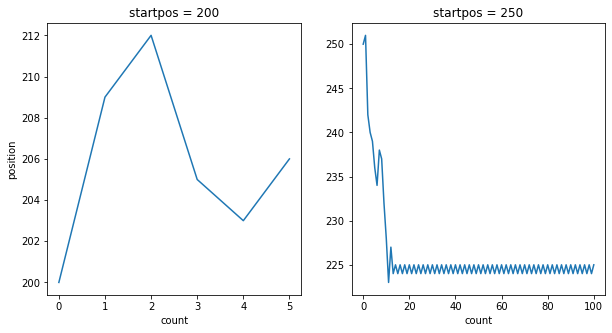

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(c_test4, p_test4)
ax[1].plot(c_test5, p_test5)

ax[0].set_title("startpos = 200")
ax[1].set_title("startpos = 250")

ax[0].set_xlabel('count')
ax[1].set_xlabel('count')

ax[0].set_ylabel('position');

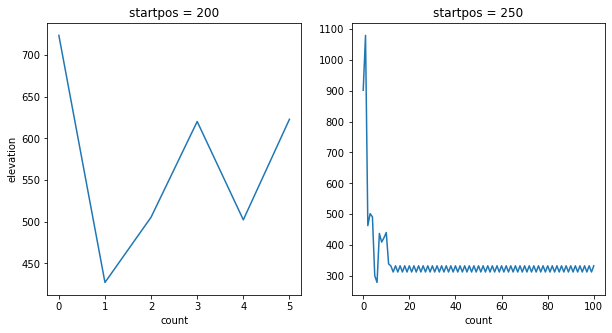

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(c_test4, e_test4)
ax[1].plot(c_test5, e_test5)

ax[0].set_title("startpos = 200")
ax[1].set_title("startpos = 250")

ax[0].set_xlabel('count')
ax[1].set_xlabel('count')

ax[0].set_ylabel('elevation');

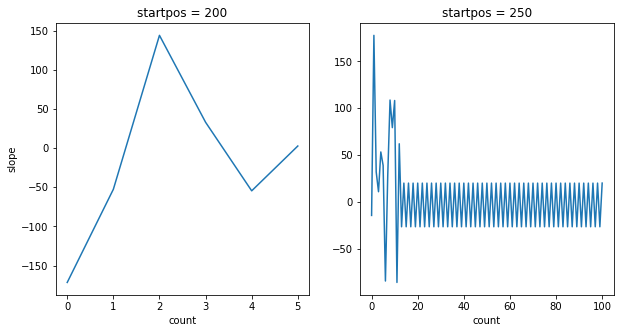

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(c_test4, s_test4)
ax[1].plot(c_test5, s_test5)

ax[0].set_title("startpos = 200")
ax[1].set_title("startpos = 250")

ax[0].set_xlabel('count')
ax[1].set_xlabel('count')

ax[0].set_ylabel('slope');

### ハイパーパラメータ = 0.01

In [31]:
c_test5, p_test5, e_test5, s_test5 = compute_gesan_re(test5, h_param=0.01) # 0.05で収束せず再挑戦

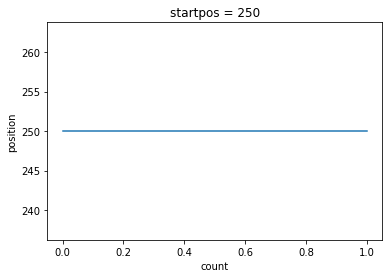

In [32]:
plt.title('startpos = 250')
plt.xlabel('count')
plt.ylabel('position')
plt.plot(c_test5, p_test5);

下げすぎるとこの様にそもそも動かない等に陥る